In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as scs 
import seaborn as sns 
from scipy.stats import norm
from statsmodels.formula.api import ols


filepath = "../Dataset/iris.csv"
iris = pd.read_csv(filepath)
iris = iris.dropna()
iris.columns = iris.columns.str.strip()
# Select only numeric columns
numeric_columns = iris.select_dtypes(include=[np.number])
# make a separate data-frame for length
length_data = iris[['sepal_length', 'petal_length']]


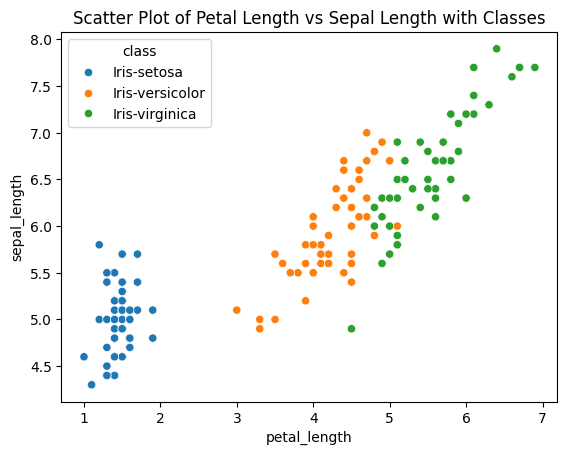

In [27]:
sns.scatterplot(data=iris, x='petal_length', y='sepal_length', hue='class')
plt.title('Scatter Plot of Petal Length vs Sepal Length with Classes')
plt.show()

In [10]:
model = ols('sepal_length ~ petal_length', data=iris).fit()

In [7]:
r,p=scs.pearsonr(iris['petal_length'], iris['sepal_length'])
print(r, p)

0.8717541573048713 1.0384540627941024e-47


In [11]:
ypred = model.predict(iris['petal_length'])
ypred

0      4.878342
1      4.878342
2      4.837429
3      4.919254
4      4.878342
         ...   
145    6.433020
146    6.351195
147    6.433020
148    6.514845
149    6.392108
Length: 150, dtype: float64

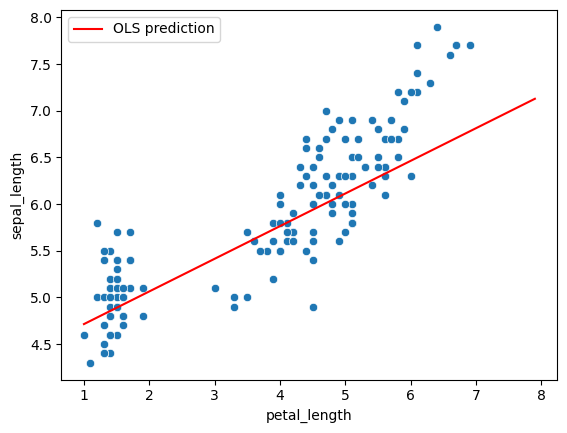

In [12]:
scatterplot = sns.scatterplot(data=iris, x='petal_length', y='sepal_length')

scatterplot.plot([iris['petal_length'].min(), iris['sepal_length'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()

0     8.396824
1    12.488083
2    24.761860
dtype: float64


<Axes: xlabel='petal_length', ylabel='sepal_length'>

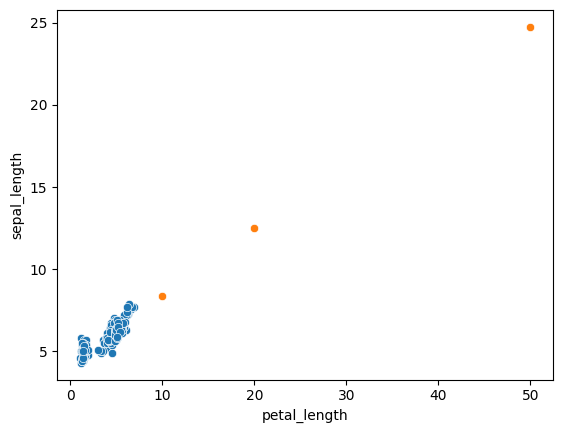

In [16]:
scatterplot = sns.scatterplot(data=iris, x='petal_length', y='sepal_length')

predictions = pd.DataFrame([10,20,50], columns=['petal_length'])
ypred = model.predict(predictions)
print(ypred)

predictions['pred'] = ypred
sns.scatterplot(data = predictions, x = 'petal_length',y = 'pred')


In [17]:
predictions = model.get_prediction(iris['petal_length'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,4.066443,5.690240
1,4.066443,5.690240
2,4.025117,5.649742
3,4.107752,5.730756
4,4.066443,5.690240
...,...,...
145,5.624122,7.241919
146,5.542759,7.159631
147,5.624122,7.241919
148,5.705415,7.324275


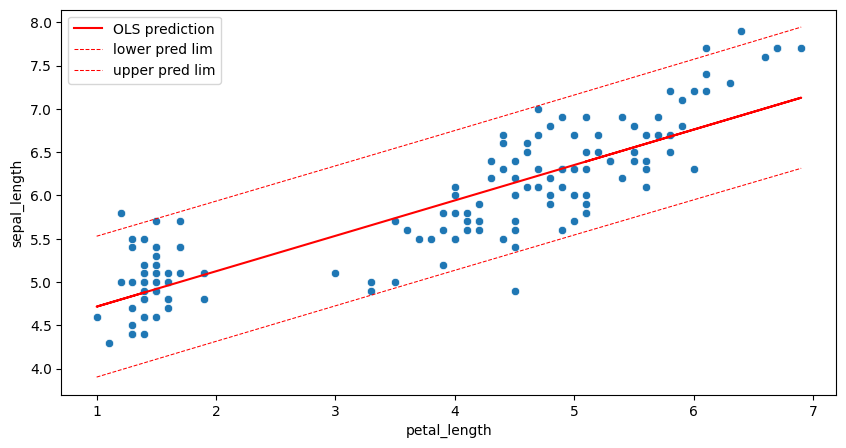

In [18]:
order = np.argsort(iris['petal_length'])
xs = np.array(iris['petal_length'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=iris, x='petal_length', y='sepal_length')
ax.plot(iris['petal_length'], ypred, "r", label="OLS prediction")

order = np.argsort(iris['petal_length'])
x = np.array(iris['petal_length'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

    petal_length
0       0.000000
1       2.083333
2       4.166667
3       6.250000
4       8.333333
5      10.416667
6      12.500000
7      14.583333
8      16.666667
9      18.750000
10     20.833333
11     22.916667
12     25.000000
13     27.083333
14     29.166667
15     31.250000
16     33.333333
17     35.416667
18     37.500000
19     39.583333
20     41.666667
21     43.750000
22     45.833333
23     47.916667
24     50.000000


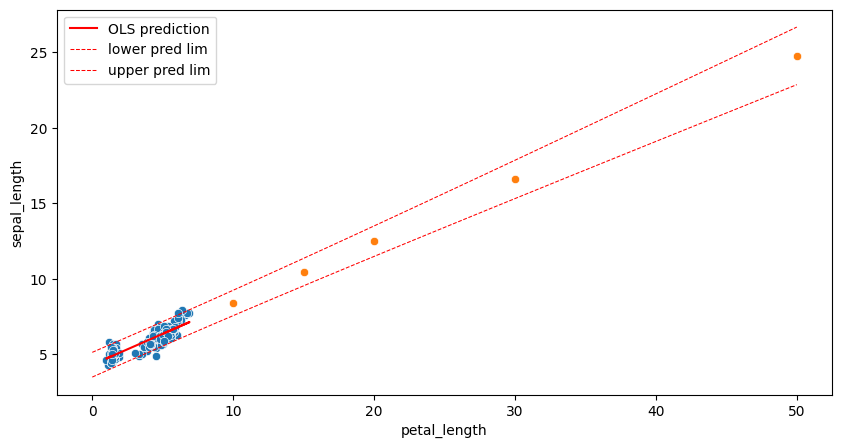

In [23]:
xs = pd.DataFrame(np.linspace(0,50,25), columns=['petal_length'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=iris, x='petal_length', y='sepal_length')
ax.plot(iris['petal_length'], ypred, "r", label="OLS prediction")

predictions_oos = pd.DataFrame([10, 15, 20, 30, 50], columns=['petal_length'])
ypred_oos = model.predict(predictions_oos)
predictions_oos['pred'] = ypred_oos
sns.scatterplot(data=predictions_oos, x='petal_length', y='pred')

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()